<a href="https://colab.research.google.com/github/gabrielrflopes/Fetal_Health_Classification/blob/main/PROJETO_Classifica%C3%A7%C3%A3o_de_Sa%C3%BAde_Fetal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align=center>
<img src="https://raw.githubusercontent.com/gabrielrflopes/Fetal_Health_Classification/main/capa_p6.png" width="100%"></p>

## Entendimento do problema

A mortalidade de bebês durante o período de gestação é um problema que exige coordenação de diversas áreas, não somente da saúde. É necessário a coordenação de áreas que vão desde a assistência social, infraestrutura de transporte, até o desenvolvimento de tecnologias e metodologias para **identificação, prevenção e tratamento das complicações que ocorrem durante a gravidez**.

De acordo com o Centro Nacional de Estatísticas para Saúde dos EUA, aproximadamente **1 milhão de mortes de bebês não-nascidos ocorrem todos os anos no país**, com quase 26 mil mortes ocorrendo acima das 20 semanas de gestação. A taxa de mortalidade fetal tem se estabilizado nos últimos anos, chegando a **5,68 óbitos por cada 1000 nascimentos totais em 2021**. No Brasil, esse valor é ainda mais alto, chegando a **9,50 óbitos por cada 1000 nascimentos totais em 2015**.

O óbito fetal é um problema sério que tem, além da perda da vida do bebê, consequências diretas na saúde da mãe, devido ao trauma e aos riscos inerentes à condição da morte do bebê. A **mortalidade maternal** é também uma grande preocupação, visto que cerca de **296 mil mortes ocorrem durante e após a gravidez, em dados de 2017 nos EUA**. Desse número, **cerca de 94% morrem por falta de recursos médicos e acompanhamento**. Trata-se, portanto, de um problema grave e que pode ser previnido com inteligência e bom gerenciamento de recursos.

No Brasil, a taxa de mortalidade maternal em 2021 era de 107 mortes a cada 100 mil nascimentos. Da mesma forma como nos EUA, a mortalidade maternal está associada à falta de recursos e acompanhamento médico recorrente, e à falha em reconhecer os sintomas que levam à perda do bebê.

De acordo com o panorama levantado nessas pesquisas, para reduzir as taxas de mortalidades fetal e maternal é necessário:

1. Reconhecer os problemas de saúde associados à mãe, doenças congênitas, condições hereditárias e complicações da gravidez, a tempo de se realizar um tratamento;

2. Providenciar acesso aos sistemas de saúde, melhorando a rede assistencial para mulheres grávidas, bem como a infraestrutura de transporte;

3. Conceder o diagnóstico e o tratamento apropriados, com acompanhamento médico frequente.

## Relevância

Este projeto se propõe a construir modelos de classificação da saúde fetal baseados em dados referentes à parâmetros que indicam a saúde do bebê. Para isso, utilizaremos dados do exame de **Cardiotocofragia** (CTG), que é um procedimento que utiliza pulsos de ultrassom para analisar a frequência cardíaca do bebê, o movimento fetal, contrações uterinas, entre outros indicadores.

A CTG é um exame simples e acessível para assegurar a saúde do bebê, permitindo que médicos e profissionais da saúde identifiquem problemas com antecedência, de modo a prevenir a mortalidade fetal e maternal.

A questão a ser respondida neste projeto é a seguinte: _"É possível utilizar dados do exame de CTG para diminuir o risco de mortalidade da mãe e do bebê em gestação?"_

Espera-se que a resposta a essa pergunta possa providenciar a médicos, especificamente obstetras e neonatologistas, uma ferramenta para diminuir a mortalidade fetal, prevenindo doenças e condições agravantes durante a gestação através de uma abordagem acessível e simples.

Portanto, nossos objetivos consistem em responder três perguntas:

1. É possível utilizar o CTG para prever a saúde fetal?

2. Se sim, quais são os fatores que mais contribuem para essa previsão?

3. Quais abordagens podem ser tomadas por planos de saúde para poderem implementar e priorizar o reconhecimento desses fatores?

A abordagem do problema passará pela criação de modelos supervisionados de aprendizado de máquina, com a construção de pipelines para pré-processamento e ajuste dos dados, buscando minimizar a taxa de erros de falsos negativos, que corresponderiam a casos graves classificados como normais.

Iremos utilizar bibliotecas como scikit-learn para construção desses pipelines, além de uma abordagem baseada em AutoML com o PyCaret.

## Bibliotecas

Para este projeto, iremos utilizar:

- **Análise exploratória dos dados**: Pandas e Numpy
- **Visualização dos dados**: Matplotlib e Seaborn
- **Machine Learning**: Scikit-learn
- **AutoML**: PyCaret

In [ ]:
'''
Análise de dados - Pandas e Numpy
Visualização de dados - Matplotlib e Seaborn
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

'''
Scikit-learn - Pré-processamento, modelos e métricas
'''
# Pré-processamento e Pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (KFold, GridSearchCV,
                                     learning_curve, LearningCurveDisplay)
# Modelos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier)
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Métricas
from sklearn.metrics import (classification_report, roc_auc_score,
                             accuracy_score, recall_score,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve

In [ ]:
'''
Instalação da biblioteca PyCaret
'''

!pip install pycaret -q

'''
Importando as funções e módulos para tarefas de classificação utilizando o AutoML
'''
from pycaret.classification import (setup, compare_models,
                                    models, create_model, predict_model)
from pycaret.classification import (tune_model, plot_model,
                                    evaluate_model, finalize_model)
from pycaret.classification import (save_model, load_model)

## Importando os Dados

Os dados foram obtidos a partir

In [ ]:
data_path = 'https://raw.githubusercontent.com/gabrielrflopes/Fetal_Health_Classification/main/Dataset/fetal_health.csv'

df = pd.read_csv(data_path)

In [ ]:
print('Dimensões do dataset',
      f'\nEntradas: \t{df.shape[0]}',
      f'\nVariáveis: \t{df.shape[1]}')

Dimensões do dataset 
Entradas: 	2126 
Variáveis: 	22


### Sobre o _dataset_

Este _dataset_ contém 2126 entradas de variáveis extraídas do exame de Cardiotocografia (CTG), que foram classificados por obstetras profissionais em 3 classes, de acordo com a saúde fetal:

- Normal (1)
- Suspeito (2)
- Patológico (3)

Visualizando as cinco primeiras entradas do conjunto de dados:

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


Visualizando as cinco últimas entradas do conjunto de dados para checar a consistência:

In [ ]:
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


In [ ]:
list(df.columns)

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health']

Vamos apenas renomear a coluna `percentage_of_time_with_abnormal_long_term_variability` e `baseline value` para manter nomes mais concisos e consistentes entre as variáveis.

In [ ]:
df.rename(columns = {'percentage_of_time_with_abnormal_long_term_variability': 'abnormal_long_term_variability',
                     'baseline value': 'baseline_value'}, inplace = True)

### Dicionário de variáveis

Como visto acima, o conjunto de dados conta com 22 variáveis que abrangem desde o batimento cardíaco fetal (FHR, _Fetal Heart Rate_) até movimentos fetais e contrações uterinas. Além disso, a partir dos dados do exame com relação ao FHR, tem-se calculado diversas estatísticas relacionadas aos batimentos cardíacos do bebê. Tratam-se das variáveis que se iniciam com `histogram`, que contém média, mediana, máximos e mínimos, entre outras análises estatísticas dos batimentos.

A **variável-alvo** é `fetal_health`, que apresenta os 3 diagnósticos possíveis para o bebê: Normal, Suspeito e Patológico. Trata-se, portanto, de 3 classes possíveis para associar cada exemplo no problema de classificação.

|                      **Variáveis**                     |                                      **Descrição**                                      |
|:------------------------------------------------------:|:---------------------------------------------------------------------------------------:|
| baseline_value                                         | Baseline dos batimentos cardíacos do bebê (FHR) por minuto                              |
| accelerations                                          | Número de acelerações por minuto                                                        |
| fetal_movement                                         | Número de movimentos fetais por segundo                                                 |
| uterine_contractions                                   | Número de contrações uterinas por segundo                                               |
| light_decelerations                                    | Número de desacelerações leves por segundo                                              |
| severe_decelerations                                   | Número de desacelerações severas por segundo                                            |
| prolongued_decelerations                               | Número de desacelerações prolongadas por segundo                                        |
| abnormal_short_term_variability                        | Percentual de tempo com variabilidade anormal de curto prazo                            |
| mean_value_of_short_term_variability                   | Valor médio da variabilidade anormal de curto prazo                                     |
| abnormal_long_term_variability | Percentual de tempo com variabilidade anormal de longo prazo                            |
| mean_value_of_long_term_variability                    | Valor médio da variabilidade anormal de longo prazo                                     |
| histogram_width                                        | Largura do histograma de batimentos cardíacos do bebê (FHR)                             |
| histogram_min                                          | Mínimo do histograma de FHR                                                             |
| histogram_max                                          | Máximo do histograma de FHR                                                             |
| histogram_number_of_peaks                              | Número de picos no histograma de FHR                                                    |
| histogram_number_of_zeroes                             | Número de zeros no histograma de FHR                                                    |
| histogram_mode                                         | Moda do histograma de FHR                                                               |
| histogram_mean                                         | Média do histograma de FHR                                                              |
| histogram_median                                       | Mediana do histograma de FHR                                                            |
| histogram_variance                                     | Variância do histograma de FHR                                                          |
| histogram_tendency                                     | Tendência do histograma de FHR                                                          |
| fetal_health                                           | Diagnóstico da saúde fetal dado pelo obstetra (1- Normal, 2 - Suspeito, 3 - Patológico) |

Vamos seguir, agora, com a Análise Exploratória dos Dados, visando compreender melhor o contexto dos dados e a presença de anomalias, como valores ausentes e _outliers_.

## 1. Análise Exploratória dos Dados

### 1.1 Tipos das variáveis

In [ ]:
df.dtypes

baseline_value                          float64
accelerations                           float64
fetal_movement                          float64
uterine_contractions                    float64
light_decelerations                     float64
severe_decelerations                    float64
prolongued_decelerations                float64
abnormal_short_term_variability         float64
mean_value_of_short_term_variability    float64
abnormal_long_term_variability          float64
mean_value_of_long_term_variability     float64
histogram_width                         float64
histogram_min                           float64
histogram_max                           float64
histogram_number_of_peaks               float64
histogram_number_of_zeroes              float64
histogram_mode                          float64
histogram_mean                          float64
histogram_median                        float64
histogram_variance                      float64
histogram_tendency                      

Como podemos ver, todas as variáveis são do tipo _float64_, inclusive o alvo `fetal_health`, pois as classes estão indexadas como 1.0, 2.0 e 3.0. Observando-se as primeiras e últimas entradas, não há nenhuma inconsistência quanto aos tipos.

### 1.2 Valores ausentes

In [ ]:
df.isna().sum()

baseline_value                          0
accelerations                           0
fetal_movement                          0
uterine_contractions                    0
light_decelerations                     0
severe_decelerations                    0
prolongued_decelerations                0
abnormal_short_term_variability         0
mean_value_of_short_term_variability    0
abnormal_long_term_variability          0
mean_value_of_long_term_variability     0
histogram_width                         0
histogram_min                           0
histogram_max                           0
histogram_number_of_peaks               0
histogram_number_of_zeroes              0
histogram_mode                          0
histogram_mean                          0
histogram_median                        0
histogram_variance                      0
histogram_tendency                      0
fetal_health                            0
dtype: int64

O conjunto de dados também não apresenta nenhum dado ausente.

### 1.3 Valores únicos por coluna

Vamos analisar os valores únicos que existem para cada variável, visando verificar quais são binárias ou multi-categóricas, distinguindo-as das contínuas.

In [ ]:
df.nunique()

baseline_value                           48
accelerations                            20
fetal_movement                          102
uterine_contractions                     16
light_decelerations                      16
severe_decelerations                      2
prolongued_decelerations                  6
abnormal_short_term_variability          75
mean_value_of_short_term_variability     57
abnormal_long_term_variability           87
mean_value_of_long_term_variability     249
histogram_width                         154
histogram_min                           109
histogram_max                            86
histogram_number_of_peaks                18
histogram_number_of_zeroes                9
histogram_mode                           88
histogram_mean                          103
histogram_median                         95
histogram_variance                      133
histogram_tendency                        3
fetal_health                              3
dtype: int64

Temos, portanto, a maioria das variáveis contínuas e apenas 4 variáveis com menos de 10 valores únicos. São eles: `severe_decelerations`, `prolongued_decelerations`, `histogram_number_of_zeroes`, `histogram_tendency`.

#### 1.3.1 Variáveis com menos de dez valores únicos

In [ ]:
df['severe_decelerations'].unique()

array([0.   , 0.001])

In [ ]:
df['prolongued_decelerations'].unique()

array([0.   , 0.002, 0.003, 0.001, 0.004, 0.005])

In [ ]:
df['histogram_number_of_zeroes'].unique()

array([ 0.,  1.,  3.,  2.,  4., 10.,  5.,  8.,  7.])

In [ ]:
df['histogram_tendency'].unique()

array([ 1.,  0., -1.])

### 1.4 Sumário estatístico

In [ ]:
df.describe().round(2)

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.00,2126.00,2126.00,2126.00,2126.00,2126.0,2126.0,2126.00,2126.00,2126.00,...,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00,2126.00
mean,133.30,0.00,0.01,0.00,0.00,0.0,0.0,46.99,1.33,9.85,...,93.58,164.03,4.07,0.32,137.45,134.61,138.09,18.81,0.32,1.30
std,9.84,0.00,0.05,0.00,0.00,0.0,0.0,17.19,0.88,18.40,...,29.56,17.94,2.95,0.71,16.38,15.59,14.47,28.98,0.61,0.61
min,106.00,0.00,0.00,0.00,0.00,0.0,0.0,12.00,0.20,0.00,...,50.00,122.00,0.00,0.00,60.00,73.00,77.00,0.00,-1.00,1.00
25%,126.00,0.00,0.00,0.00,0.00,0.0,0.0,32.00,0.70,0.00,...,67.00,152.00,2.00,0.00,129.00,125.00,129.00,2.00,0.00,1.00
50%,133.00,0.00,0.00,0.00,0.00,0.0,0.0,49.00,1.20,0.00,...,93.00,162.00,3.00,0.00,139.00,136.00,139.00,7.00,0.00,1.00
75%,140.00,0.01,0.00,0.01,0.00,0.0,0.0,61.00,1.70,11.00,...,120.00,174.00,6.00,0.00,148.00,145.00,148.00,24.00,1.00,1.00
max,160.00,0.02,0.48,0.02,0.02,0.0,0.0,87.00,7.00,91.00,...,159.00,238.00,18.00,10.00,187.00,182.00,186.00,269.00,1.00,3.00


O sumário estatístico do conjunto de dados em questão contém muitas informações, visto que todas as variáveis são numéricas, apenas com o alvo codificado para distinguir entre as classes. Contudo, observando a relação entre médias, medianas e valores máximos, nenhuma variável aparenta ter valores discrepantes que indiquem a presença de muitos _outliers_.

Talvez uma variável que compensa analisar mais de perto é a `abnormal_long_term_variability`, cujos valores até o terceiro quartil é igual a zero, e o valor máximo é 91.0. Isto pode apenas representar que a variável é muito enviesada para valores baixos.

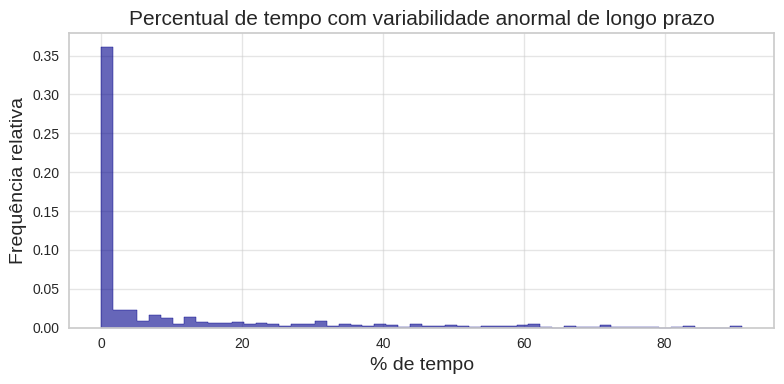

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.histplot(
             df['abnormal_long_term_variability'],
             element = 'step',
             ax = ax,
             stat = 'density',
             alpha = .6,
             color = 'darkblue'
             )

ax.grid(alpha = .5)
ax.set_title('Percentual de tempo com variabilidade anormal de longo prazo', fontsize = 15)
ax.set_xlabel('% de tempo', fontsize = 14)
ax.set_ylabel('Frequência relativa', fontsize = 14)

fig.tight_layout()
fig.show()

De fato, essa variável é bastante enviesada, com a maioria dos valores (35%) se concentrando no intervalo próximo a zero. Isto é provavelmente reflexo do fato de que a maioria dos casos são de diagnósticos normais, com bebês fora de perigo. Como a variável trata de um comportamento anormal, é natural que seja enviesada para valores baixos.

### 1.5 Distribuição das classes da variável-alvo

Vamos analisar agora a distribuição das classes na variável-alvo, `fetal_health`. Espera-se que seja um problema bastante desbalanceado, visto que as ocorrências de patologias durante a gestação apresentam uma probabilidade relativamente pequena de acontecer, se comparado com a quantidade de gestações normais.

In [ ]:
class_count = df['fetal_health'].value_counts()

print('Distribuição das classes no alvo:\n')

class_count

Distribuição das classes no alvo:



1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

De fato, vemos que a maioria das entradas são de bebês com saúde normal, enquanto que 295 apresentam um estado suspeito e apenas 176 estão num estado patológico de saúde fetal.

Vamos visualizar os percentuais de cada classe:

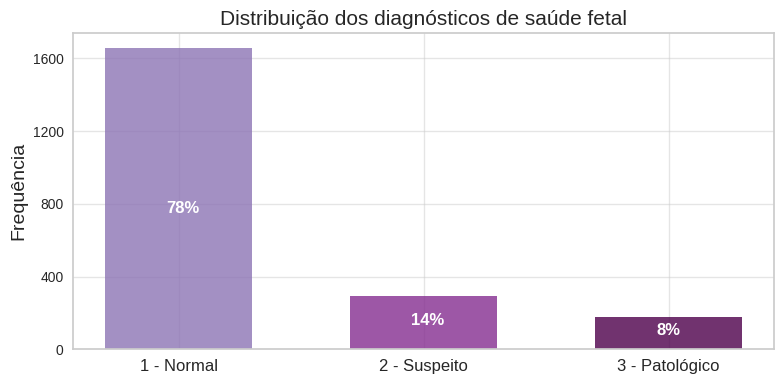

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

'''
Criando a visualização em gráfico de barras
'''

cmap = cm.BuPu(np.linspace(.6, 1, 3))

ax.bar(
       x = class_count.index,
       height = class_count,
       width = .6,
       color = cmap,
       alpha = .8
       )

ax.set_xticks(ticks = [1, 2, 3],
              labels = ['1 - Normal', '2 - Suspeito', '3 - Patológico'],
              fontsize = 12)

ax.set_yticks(ticks = np.arange(0, 1800, 400))

ax.grid(alpha = .5)
ax.set_title('Distribuição dos diagnósticos de saúde fetal', fontsize = 15)
ax.set_ylabel('Frequência', fontsize = 14)

'''
Inserindo as anotações com as porcentagens de cada classe
'''

for p in ax.patches:

  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()

  ax.annotate(
      '{:.0f}%'.format(height / df.__len__() * 100),
       (x + width / 2.4, y + height / 2.2),
      color = 'white',
      weight = 'bold'
      )

fig.tight_layout()
fig.show()

Portanto, temos que:

- 78% dos casos descritos no conjunto de dados são de bebês com estado de saúde normal;
- 14% estão num estado suspeito e 8% foram diagnosticados como casos patológicos;

Note contudo, que do contexto dos dados podemos inferir que um caso suspeito deve ser tratado com a mesma seriedade de um patológico, isto é, com exames de rotina, acompanhamento médico e tratamentos para garantir a saúde do bebê e da mãe.

Sendo assim, queremos criar modelos que consigam identificar casos de risco, sem distinção da gravidade implícita entre "suspeito" e "patológico". Por esse motivo, convém criar uma nova variável que reúna as classes 2 e 3 em uma só que expressa que o bebê está em risco.

### 1.6 Feature Engineering

Vamos criar uma nova variável para ser o nosso alvo. Nessa variável, iremos reunir as duas classes que se referem a diagnósticos mais graves da saúde fetal, de modo que possamos ter a mesma abordagem independente do caso ser suspeito ou patológico.

In [ ]:
# Criando uma cópia do dataframe
df_new = df.copy()

# Criando a nova variável com valor default na coluna
df_new['fh_class'] = 0

# Assinalando os valores referentes às classes da variável original
df_new.loc[df_new['fetal_health'] == 1.0, 'fh_class'] = 'Normal'
df_new.loc[df_new['fetal_health'] == 2.0, 'fh_class'] = 'Grave'
df_new.loc[df_new['fetal_health'] == 3.0, 'fh_class'] = 'Grave'

In [ ]:
df_new[['fetal_health', 'fh_class']].head()

,fetal_health,fh_class
0,2.0,Grave
1,1.0,Normal
2,1.0,Normal
3,1.0,Normal
4,1.0,Normal


Agora que temos a nova variável-alvo definida, tornando o problema de classificação binário, podemos excluir a antiga variável-alvo `fetal_health`, uma vez que seria redundante mantê-la e porque ela não teria nenhum poder preditivo na construção dos modelos.

In [ ]:
df_new.drop(columns = 'fetal_health', inplace = True)

In [ ]:
print('Nova distribuição das classes no alvo:\n')

class_count = df_new['fh_class'].value_counts()

class_count

Nova distribuição das classes no alvo:



Normal    1655
Grave      471
Name: fh_class, dtype: int64

Portanto, agora temos uma nova classe que diz respeito a bebês cujo exame de CTG apresentou algum desvio ou anomalia que deve ser tratado com a mesma gravidade, independente se é um caso suspeito ou já patológico.

Vamos visualizar as distribuições das classes da nova variável-alvo:

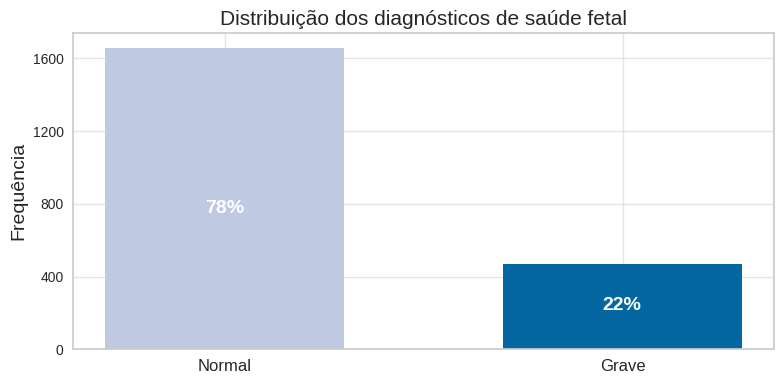

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

cmap = cm.PuBu(np.linspace(.3, .8, 2))

ax.bar(
       x = class_count.index,
       height = class_count,
       width = .6,
       color = cmap
       )

ax.set_xticks(ticks = [0, 1], labels = ['Normal', 'Grave'], fontsize = 12)
ax.set_yticks(np.arange(0, 1800, 400))
ax.grid(alpha = .5)
ax.set_title('Distribuição dos diagnósticos de saúde fetal', fontsize = 15)
ax.set_ylabel('Frequência', fontsize = 14)

for p in ax.patches:

  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()

  ax.annotate(
      '{:.0f}%'.format(height / df.__len__() * 100),
       (x + width / 2.4, y + height / 2.2),
      color = 'white',
      weight = 'bold',
      fontsize = 14
      )


fig.tight_layout()
fig.show()

O problema segue desbalanceado, porém agora temos um distinção mais clara da quantidade de casos que devem ser tratados com atenção e urgência, de modo a conseguir o melhor tratamento e, consequentemente, salvar mais vidas.

#### 1.6.1 Codificando a variável-alvo

Vamos realizar uma simples codificação da variável-alvo, associando às classes _Normal_ e _Grave_ os valores 0 e 1, respectivamente.

In [ ]:
df_new['fh_class'] = df_new['fh_class'].replace({'Grave': 1, 'Normal': 0})

df_new.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_class
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0


### 1.7 Correlação

Vamos analisar agora a correlação entre as variáveis independentes e o alvo, de modo a averiguar quais estão positiva e negativamente relacionadas à incidência de risco para a saúde fetal.

In [ ]:
# definindo as correlações para todas as variáveis
corr = df_new.corr()

# definindo uma variável para as correlações com o alvo apenas
corr_target = corr['fh_class'][:-1].sort_values(ascending = False)

corr_target

abnormal_short_term_variability         0.493391
abnormal_long_term_variability          0.489400
prolongued_decelerations                0.340554
baseline_value                          0.251875
histogram_min                           0.158171
severe_decelerations                    0.087967
histogram_variance                      0.085948
fetal_movement                          0.060974
histogram_number_of_zeroes             -0.031163
light_decelerations                    -0.032889
histogram_median                       -0.047890
histogram_max                          -0.048106
histogram_mean                         -0.059107
histogram_number_of_peaks              -0.060354
histogram_tendency                     -0.066529
histogram_mode                         -0.092320
histogram_width                        -0.142182
mean_value_of_long_term_variability    -0.172519
mean_value_of_short_term_variability   -0.207717
uterine_contractions                   -0.263639
accelerations       

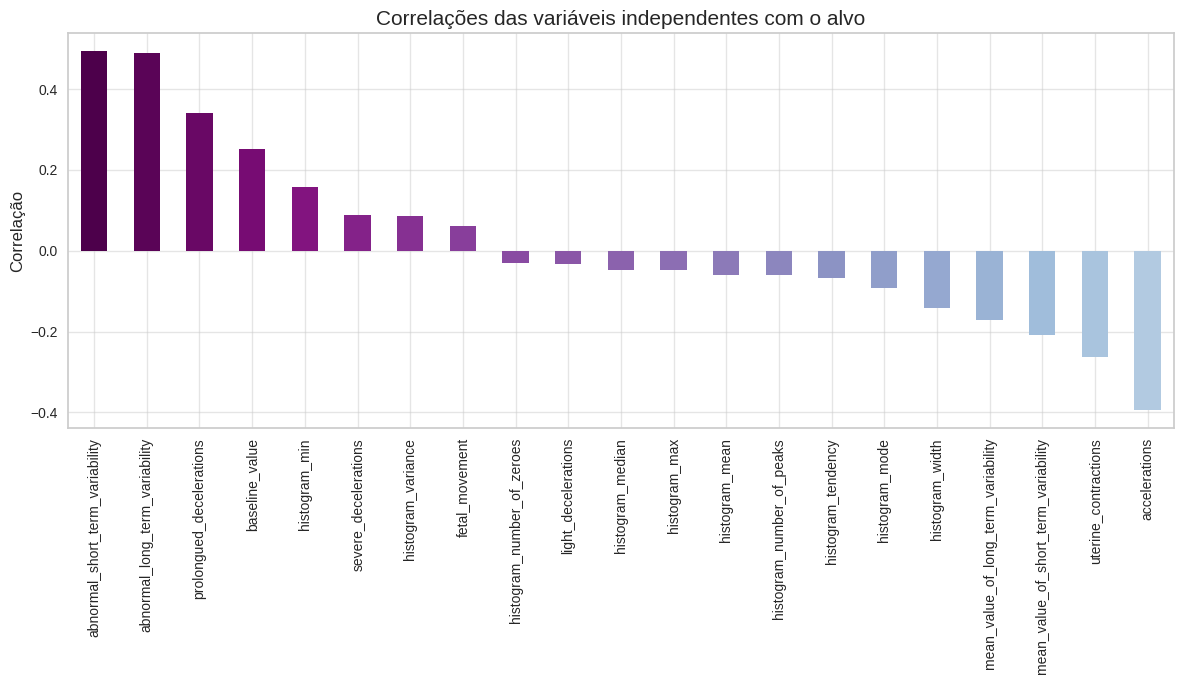

In [ ]:
fig, ax = plt.subplots(figsize = (12, 7))

cmap = cm.BuPu_r(np.linspace(0, .7, len(corr_target)))

corr_target.plot(
                 kind = 'bar',
                 color = cmap,
                 ax = ax
                 )

ax.grid(alpha = .5)
ax.set_title('Correlações das variáveis independentes com o alvo', fontsize = 15)
ax.set_ylabel('Correlação', fontsize = 12)


fig.tight_layout()
fig.show()

No gráfico de correlações, temos dispostas o quão relacionadas estão as variáveis independentes com o alvo, tanto positivamente quanto negativamente. Valores positivos da correlação apontam para uma maior probabilidade daquela variável prever a classe 1 (**Grave**), ao passo que valores negativos apontam para a probabilidade das variáveis ajudarem na previsão da classe 0 (**Normal**).

É importante lembrar que correlação não implica necessariamente causalidade, ou seja, não é porque duas variáveis estão correlacionadas que uma seja a causa da outra. Com isso em mente, as variáveis que mais se correlacionam **positivamente** com o alvo são:

1. **Variabilidade anormal de curto prazo** (`abnormal_short_term_variability`) (+ 0.493)
2. **Variabilidade anormal de longo prazo** (`abnormal_long_term_variability`) (+ 0.489)
3. **Desacelerações prolongadas** (`prolongued_decelerations`) (+ 0.340)
4. **Valor de base** (`baseline_value`) (+ 0.252)

As variáveis mais correlacionadas **negativamente** são:

1. **Acelerações** (`accelerations`) (- 0.395)
2. **Contrações uterinas** (`uterine_contractions`) (- 0.264)
3. **Valor médio da variabilidade de curto prazo** (`mean_value_short_term_variability`) (- 0.208)
4. **Valor médio da variabilidade de longo prazo** (`mean_value_long_term_variability`) (- 0.172)






#### 1.7.1 Distribuições das variáveis mais correlacionadas

In [ ]:
pos_corr = ['abnormal_short_term_variability',
            'abnormal_long_term_variability',
            'prolongued_decelerations',
            'baseline_value']

neg_corr = ['accelerations',
            'uterine_contractions',
            'mean_value_of_short_term_variability',
            'mean_value_of_long_term_variability']

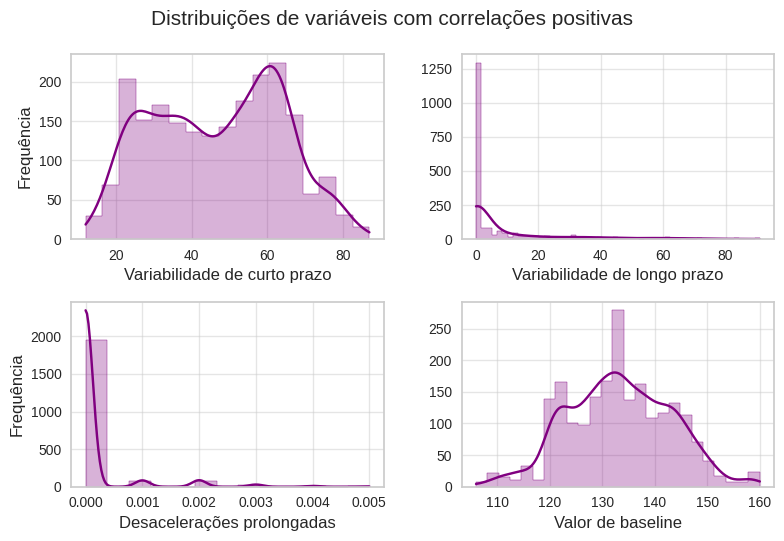

In [ ]:
fig, ax = plt.subplots(2, 2)
ax = ax.flatten()

for i, col in zip(range(4), pos_corr):

  sns.histplot(
               df_new[col],
               alpha = .3,
               element = 'step',
               kde = True,
               color = 'purple',
               ax = ax[i],
               )

  ax[i].grid(alpha = .5)

  if i in [0, 1]:

    ax[2*i].set_ylabel('Frequência', fontsize = 12)
    ax[2*i + 1].set_ylabel(' ')

ax[0].set_xlabel('Variabilidade de curto prazo', fontsize = 12)
ax[1].set_xlabel('Variabilidade de longo prazo', fontsize = 12)
ax[2].set_xlabel('Desacelerações prolongadas', fontsize = 12)
ax[3].set_xlabel('Valor de baseline', fontsize = 12)

fig.suptitle('Distribuições de variáveis com correlações positivas', fontsize = 15)
fig.tight_layout()
fig.show()

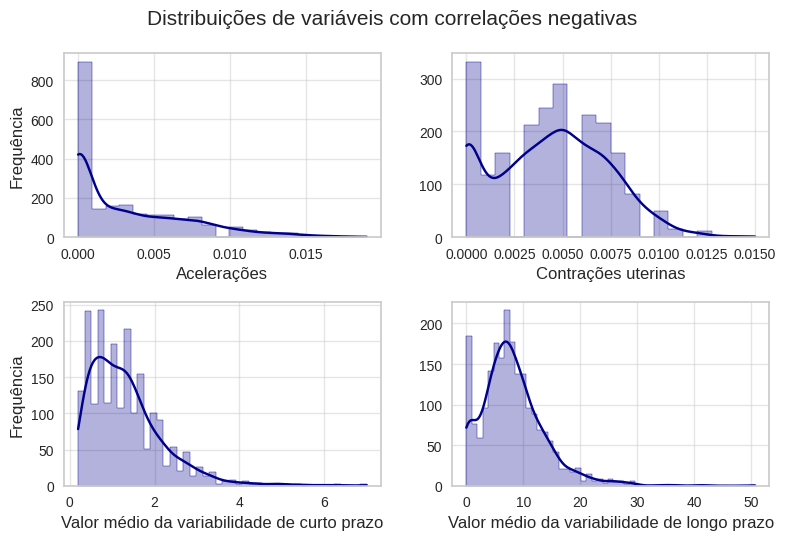

In [ ]:
fig, ax = plt.subplots(2, 2)
ax = ax.flatten()

for i, col in zip(range(4), neg_corr):

  sns.histplot(
               df_new[col],
               alpha = .3,
               element = 'step',
               kde = True,
               color = 'darkblue',
               ax = ax[i],
               )

  ax[i].grid(alpha = .5)

  if i in [0, 1]:

    ax[2*i].set_ylabel('Frequência', fontsize = 12)
    ax[2*i + 1].set_ylabel(' ')

ax[0].set_xlabel('Acelerações', fontsize = 12)
ax[1].set_xlabel('Contrações uterinas', fontsize = 12)
ax[2].set_xlabel('Valor médio da variabilidade de curto prazo', fontsize = 12)
ax[3].set_xlabel('Valor médio da variabilidade de longo prazo', fontsize = 12)

fig.suptitle('Distribuições de variáveis com correlações negativas', fontsize = 15)
fig.tight_layout()
fig.show()

## 2. Visualização dos Dados

Vamos agora visualizar as correlações entre as variáveis através de gráficos de dispersão, buscando identificar como as distinções entre as classes se manifestam entre as variáveis e se são capazes de dividir bem os dados.

- **Variabilidade anormal de curto prazo**

Variabilidade anormal de curto prazo refere-se às flutuações dos batimentos cardíacos do bebê, que acontecem num período de segundos. É considerado um **sinal positivo** de que o sistema nervoso autônomo do bebê está funcionando normalmente. Em um bebê saudável, é esperado que a taxa de batimentos cardíacos varie ligeiramente em comparação com os valores de base.

Variabilidade anormal de curto prazo no exame de CTG se refere a variações reduzidas ou não-existentes na taxa de batimentos por intervalos curtos de tempo. Estas são razões de preocupação, pois podem indicar que o bebê sofre de hipóxia (falta de oxigênio), ou acidemia (aumento da acidez do sangue), entre outras condições que podem afetar seu sistema nervoso.

- **Variabilidade anormal de longo prazo**

De maneira análoga, a variabilidade de longo prazo se refere a variações na taxa de batimentos cardiácos do bebê que ocorrem em intervalos de minutos. Essas flutuações são esperadas e causadas por vários fatores, como o sistema nervoso do bebê, movimentos e contrações uterinas. É um bom sinal que mostra que o bebê responde a mudanças no seu ambiente.  

Já as variações anormais representam desvios significativos dos padrões de base para os batimentos cardíacos por longos períodos. Elas podem estar associadas à redução ou ausência da variabilidade esperada por longos períodos, ou mudanças abruptas e irregulares na taxa de batimentos, que podem indicar falta de oxigênio ou compressão do cordão umbilical.

Essa medida de variabilidade pode estar associada também às desacelerações prolongadas, quando a taxa de batimentos do bebê cai para valores muito abaixo dos padrões por longos períodos de tempo.

Vamos analisar como as desacelerações prolongadas estão relacionadas com o alvo:

In [ ]:
vars = ['abnormal_short_term_variability',
        'abnormal_long_term_variability']

columns = ['prolongued_decelerations', 'uterine_contractions',
           'fetal_movement', 'accelerations']

### 2.1 Desaceleração prolongada

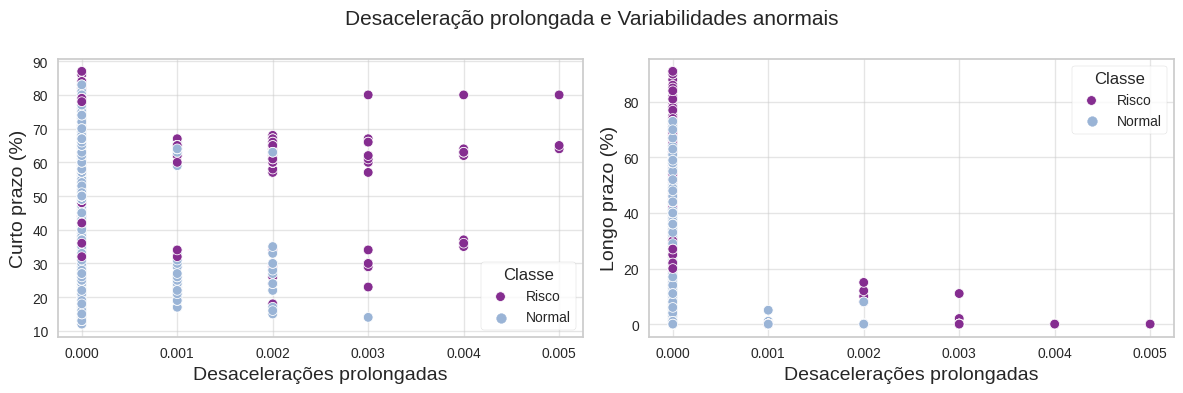

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

colors = cm.BuPu(np.linspace(.4, .8, 2))

for i in range(2):

  sns.scatterplot(
                  data = df_new,
                  x = columns[0],
                  y = vars[i],
                  hue = 'fh_class',
                  palette = colors,
                  ax = ax[i]
                 )

  ax[i].grid(alpha = .5)
  ax[i].legend(title = 'Classe', labels = ['Risco', 'Normal'], frameon = True)
  ax[i].set_xlabel('Desacelerações prolongadas', fontsize = 14)

ax[0].set_ylabel('Curto prazo (%)', fontsize = 14)
ax[1].set_ylabel('Longo prazo (%)', fontsize = 14)

fig.suptitle('Desaceleração prolongada e Variabilidades anormais', fontsize = 15)
fig.tight_layout()
fig.show()

Com relação às variabilidades anormais de curto prazo, note que para desacelerações prolongadas a partir de 0.002 existe maior chance do feto estar em risco. Para desacelerações de 0.004 e 0.005, todos os casos são de risco e tendem a apresentar variabilidades de curto prazo maiores que 40%.

Ou seja, se a taxa de batimentos cardíacos apresenta variações anormais em 40% ou mais das medidas, e as desacelerações prolongadas estão acontecendo com mais intensidade, então o feto está em risco.

No caso das variabilidades anormais de longo prazo, nota-se que para variações maiores que 70%, o feto corre risco independente de apresentar ou não desacelerações prolongadas. Para desacelerações a partir de 0.002, a probabilidade de estar em risco é alta, mesmo que não apresente variabilidades de longo prazo.

### 2.2 Contrações uterinas

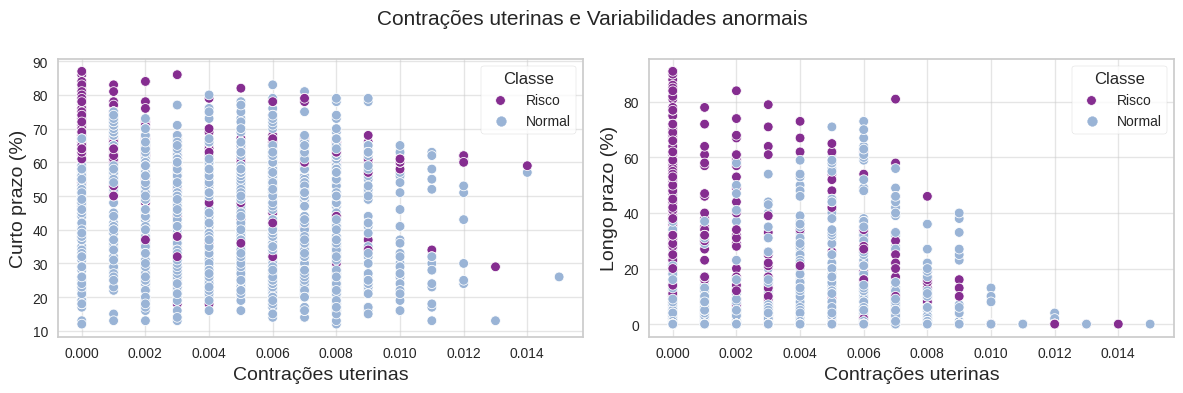

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

colors = cm.BuPu(np.linspace(.4, .8, 2))

for i in range(2):

  sns.scatterplot(
                  data = df_new,
                  x = columns[1],
                  y = vars[i],
                  hue = 'fh_class',
                  palette = colors,
                  ax = ax[i]
                 )

  ax[i].grid(alpha = .5)
  ax[i].legend(title = 'Classe', labels = ['Risco', 'Normal'], frameon = True)
  ax[i].set_xlabel('Contrações uterinas', fontsize = 14)

ax[0].set_ylabel('Curto prazo (%)', fontsize = 14)
ax[1].set_ylabel('Longo prazo (%)', fontsize = 14)

fig.suptitle('Contrações uterinas e Variabilidades anormais', fontsize = 15)
fig.tight_layout()
fig.show()

Para variabilidades de curto prazo, note que é normal por alguns segundos não haver contrações uterinas, sem que isso signifique que o bebê esteja em risco. Se o bebê está a mais de 60% do tempo com variações anormais de curto prazo, e sem contrações uterinas, então muito provavelmente ele está em risco.

Para variações anormais de longo prazo, a tolerância é bem menor para contrações uterinas nulas. Se o bebê está a mais de 15% do tempo com variações anormais de longo prazo e sem contrações uterinas, significa que ele está em risco.

Há maior probabilidade de bebês com saúde normal apresentarem contrações uterinas medidas entre 0.002 e 0.011, como pode ser visto nos gráficos ao observar a densidade de pontos relacionados à classe normal nesse intervalo.

### 2.3 Movimentos fetais

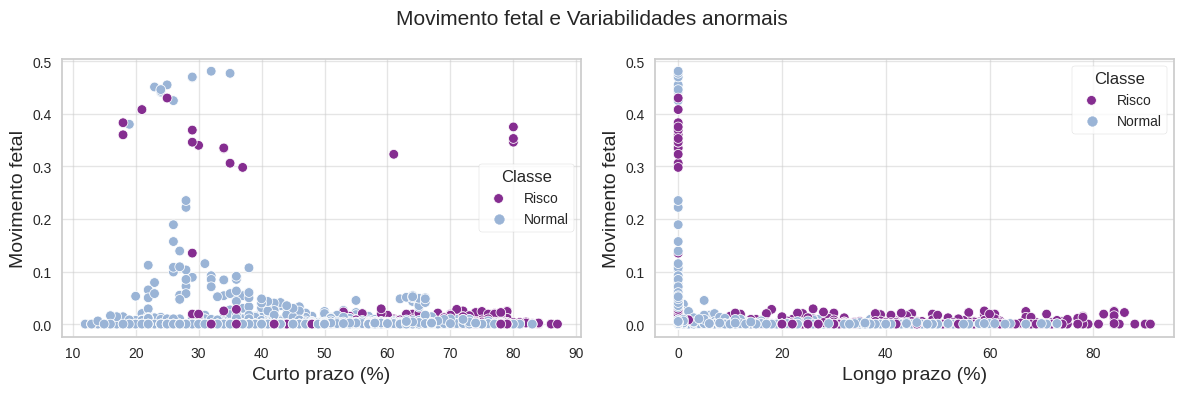

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

colors = cm.BuPu(np.linspace(.4, .8, 2))

for i in range(2):

  sns.scatterplot(
                  data = df_new,
                  x = vars[i],
                  y = columns[2],
                  hue = 'fh_class',
                  palette = colors,
                  ax = ax[i]
                 )

  ax[i].grid(alpha = .5)
  ax[i].legend(title = 'Classe', labels = ['Risco', 'Normal'], frameon = True)
  ax[i].set_ylabel('Movimento fetal', fontsize = 14)

ax[1].set_xlabel('Longo prazo (%)', fontsize = 14)
ax[0].set_xlabel('Curto prazo (%)', fontsize = 14)

fig.suptitle('Movimento fetal e Variabilidades anormais', fontsize = 15)
fig.tight_layout()
fig.show()

Para variações de curto prazo, nota-se que:

- Pouco movimento fetal para até 50% de variação é considerado normal. A partir de 60% do tempo com variações anormais e sem movimento, maiores as chances de risco.

- Movimento fetal acima de 0.3 é um sinal de risco, independente de haver ou não muitas variações de curto prazo.

Para variações de longo prazo, nota-se que:

- Nenhum movimento fetal até 20% de variações anormais são, em sua maioria, casos normais. Se o bebê não se move e apresenta variações anormais dos batimentos cardíacos por longos períodos, então ele está em risco.

- Novamente, vemos que se o bebê está muito agitado, com medidas de movimento fetal acima de 0.3, então ele provavelmente está em risco.

### 2.4 Acelerações

As acelerações se referem a aumentos momentâneos da taxa de batimentos cardíacos do bebê acima dos valores padrões. Elas são consideradas um sinal positivo de que o bebê está responsivo e recebendo oxigênio e nutrientes suficientes. A presença das acelerações frequentemente indicam, portanto, que o bebê não está sob estresse no momento.

No exame de CTG, as acelerações são medidas observando-se o aumento e o retorno dos batimentos para o valor básico. Usualmente, essas acelerações acontecem por um curto período, tipicamente 15 segundos, mas podem variar.

Vamos analisar como essa medida se relaciona com as variabilidades anormais de curto e longo prazos:

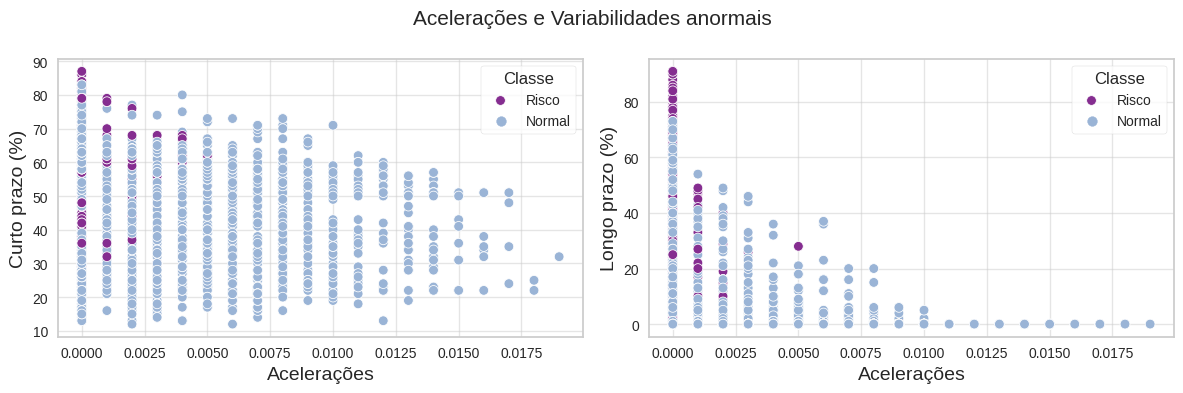

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

colors = cm.BuPu(np.linspace(.4, .8, 2))

for i in range(2):

  sns.scatterplot(
                  data = df_new,
                  x = columns[3],
                  y = vars[i],
                  hue = 'fh_class',
                  palette = colors,
                  ax = ax[i]
                 )

  ax[i].grid(alpha = .5)
  ax[i].legend(title = 'Classe', labels = ['Risco', 'Normal'], frameon = True)
  ax[i].set_xlabel('Acelerações', fontsize = 14)

ax[1].set_ylabel('Longo prazo (%)', fontsize = 14)
ax[0].set_ylabel('Curto prazo (%)', fontsize = 14)

fig.suptitle('Acelerações e Variabilidades anormais', fontsize = 15)
fig.tight_layout()
fig.show()

Como vimos acima, as acelerações indicam que o bebê é saudável e, quanto mais acelerações, mais as chances da saúde do bebê estar boa. De fato, é o atributo que mais se correlaciona negativamente com a classe de risco.

Na análise dos gráficos acima, vemos que as incidências de risco para a saúde do bebê ocorre justamente para valores de acelerações baixas ou nulas.



### 2.5 Desacelerações e Contrações

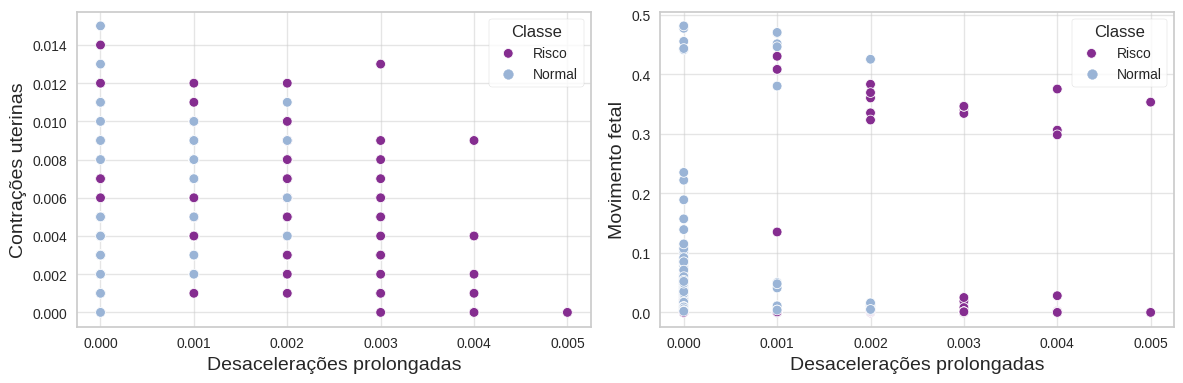

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

colors = cm.BuPu(np.linspace(.4, .8, 2))

sns.scatterplot(
                data = df_new,
                x = 'prolongued_decelerations',
                y = 'uterine_contractions',
                hue = 'fh_class',
                palette = colors,
                ax = ax[0]
                )

sns.scatterplot(
                data = df_new,
                x = 'prolongued_decelerations',
                y = 'fetal_movement',
                hue = 'fh_class',
                palette = colors,
                ax = ax[1]
                )

ax[0].grid(alpha = .5)
ax[1].grid(alpha = .5)

ax[0].set_xlabel('Desacelerações prolongadas', fontsize = 14)
ax[0].set_ylabel('Contrações uterinas', fontsize = 14)
ax[0].legend(title = 'Classe', labels = ['Risco', 'Normal'], frameon = True)

ax[1].set_xlabel('Desacelerações prolongadas', fontsize = 14)
ax[1].set_ylabel('Movimento fetal', fontsize = 14)
ax[1].legend(title = 'Classe', labels = ['Risco', 'Normal'], frameon = True)

fig.tight_layout()
fig.show()

São interessantes as relações entre as variáveis `prolongued_decelerations`, `uterine_contractions` e `fetal_movement`.

As contrações uterinas são sinais de que existe alguma resposta do feto, indicando saúde. Porém, se as contrações são muito frequentes, elas podem comprometer a entrega de oxigênio ao bebê. Por isso, vemos que para valores acima de 0.010, as contrações uterinas passam a ser um sinal de risco. Já as desacelerações, elas passam a indicar risco a partir de 0.002.

Quanto ao movimento fetal, este se relaciona com as acelerações discutidas anteriormente, de modo que quanto mais o bebê se movimentar, maiores serão as acelerações dos batimentos, o que é um sinal de saúde. As desacelerações, por outro lado, estão relacionadas na medida em que o bebê realiza movimentos abruptos. Da mesma forma, a partir de 0.002, as desacelerações passam a ser um risco.

### 2.6 Variabilidades anormais de curto e longo prazo

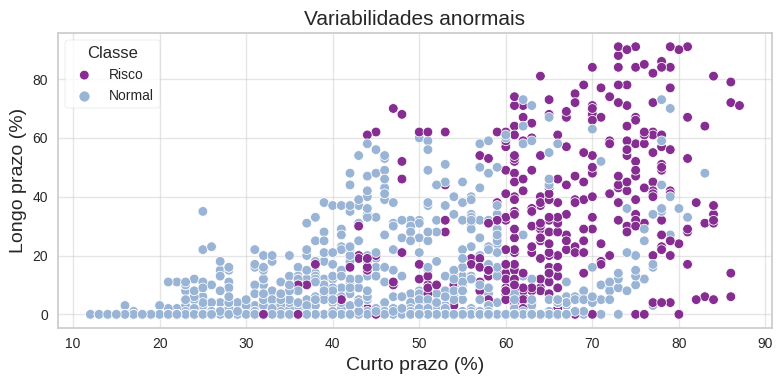

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

colors = cm.BuPu(np.linspace(.4, .8, 2))

sns.scatterplot(data = df_new,
                x = 'abnormal_short_term_variability',
                y = 'abnormal_long_term_variability',
                hue = 'fh_class',
                palette = colors,
                ax = ax)

ax.grid(alpha = .5)
ax.set_title('Variabilidades anormais', fontsize = 15)
ax.set_xlabel('Curto prazo (%)', fontsize = 14)
ax.set_ylabel('Longo prazo (%)', fontsize = 14)
ax.legend(title = 'Classe', labels = ['Risco', 'Normal'], frameon = True)

fig.tight_layout()
fig.show()

O gráfico acima mostra a porcentagem de tempo com variabilidade anormal de curto e longo prazo para os exemplos do conjunto de dados.

Os pontos coloridos em roxo indica os casos em **risco**, e nota-se que todos eles se encontram na região de alta porcentagem de tempo com variabilidades anormais, tanto no curto (> 60%) quanto no longo prazo (> 20%). Estes dois atributos são de fato bem informativos para nossa análise e distinguem bem entre os casos normais e em risco.

## 3. Pré-processamento

Com a análise exploratória dos dados nos fornecendo informações importantes a respeito das variáveis, iremos agora dividir os dados entre a matriz de atributos e o alvo, para começar a construção dos modelos na próxima seção.

### 3.1 Separação dos Dados

Iremos separar os dados atribuindo as variáveis X e y à matriz de atributos e ao alvo, respectivamente.

In [ ]:
df_proc = df_new.copy()

X = df_proc.drop('fh_class', axis = 1)
y = df_proc['fh_class']

print(f'X: {X.shape}',
      f'\ny: {y.shape}')

X: (2126, 21) 
y: (2126,)


Utililzando o método `train_test_split`, iremos separar os conjunto de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y, random_state = 42)

print(f'X_train: {X_train.shape}',
      f'\ny_train: {y_train.shape}',
      f'\n\nX_test: {X_test.shape}',
      f'\ny_test: {y_test.shape}')

X_train: (1488, 21) 
y_train: (1488,) 

X_test: (638, 21) 
y_test: (638,)


## 4. Modelo de Base

### 4.1 Modelo Baseline de Árvore de Decisão

Vamos construir um modelo de baseline com o algoritmo de árvore de decisão. O intuito é que tenhamos uma performance de referência num modelo básico sem otimizações, para que então possamos comparar a outros classificadores.

Temos duas situações, uma com dados desbalanceados para a variável-alvo, havendo uma proporção maior de exemplos da classe que indica a saúde normal do bebê, e outra com dados balanceados. Para este último caso, iremos utilizar o argumento `class_weight = 'balanced'` para assegurar o balanceamento feito pelo algoritmo do classificador.

#### 4.1.1 Dados desbalanceados

In [ ]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 42)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'Recall: {recall_score(y_test, y_pred):.3f}')
print(f'AUC:\t{roc_auc_score(y_test, y_pred):.3f}')

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       497
           1       0.89      0.77      0.83       141

    accuracy                           0.93       638
   macro avg       0.92      0.87      0.89       638
weighted avg       0.93      0.93      0.93       638

Recall: 0.773
AUC:	0.873


A acurácia do modelo de base não foi ruim, atingindo 93%. Note, contudo, que a métrica de _recall_, que nos diz a proporção de exemplos classificados corretamente como graves foi de 77%. Ou seja, 23% dos casos analisados no exame de CTG que passaram pelo nosso modelo foram considerados normais, quando na verdade eram graves. No contexto em que estes erros podem arriscar a vida da mãe e do bebê, é necessário maximizar a métrica de _recall_, mesmo que para isso percamos em acurácia ou, mais provavelmente, precisão.

In [ ]:
def plot_confusion_matrix(y_pred):

  '''
  Função básica para plotar a matriz de confusão para
  cada modelo.

  y_pred: Classes previstas pelo modelos com o conjunto de teste.

  '''

  fig, ax = plt.subplots()

  cm_model = confusion_matrix(y_test, y_pred, normalize = 'true')

  cm_display = ConfusionMatrixDisplay(cm_model)

  cm_display.plot(ax = ax, cmap = 'BuPu')

  ax.grid(False)
  ax.set_xlabel('Classe prevista', fontsize = 12)
  ax.set_ylabel('Classe real', fontsize = 12)

  fig.tight_layout()
  fig.show()

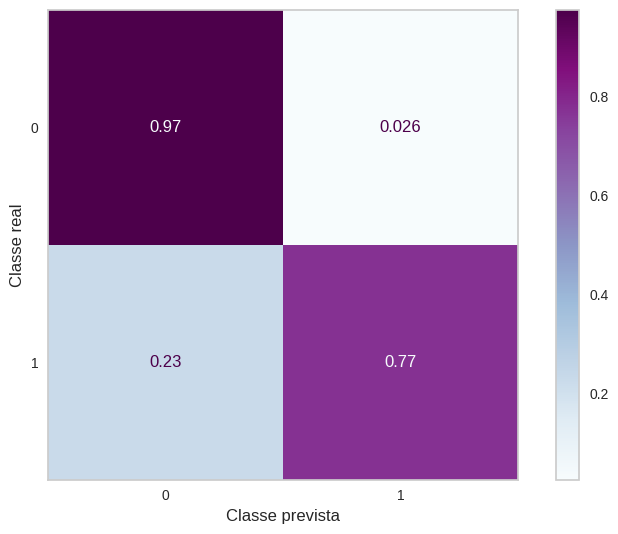

In [ ]:
plot_confusion_matrix(y_pred)

**Importância dos Atributos**

Vamos analisar agora como o algoritmo priorizou os atributos, através da análise de _feature importances_. Os atributos mais importantes são aqueles que melhoram a capacidade do modelo decidir entre as classes, providenciando maiores informações a respeito dos padrões nos dados.

Vamos criar uma função que organiza as importâncias dos atributos em ordem decrescente e os plota em um gráfico de barras horizontal.

In [ ]:
def plot_feature_importances(model):

  '''
  Função que retorna um gráfico de importância de cada atributo
  para a elaboração do modelo.

  model: classificador para plotar as feature importances
  '''

  n_features = X_train.shape[1]
  sorted_features = pd.Series(model.feature_importances_).sort_values()
  features_names = pd.Series(X_train.columns).to_dict()

  sorted_features.index = sorted_features.index.map(features_names)

  colors = cm.BuPu(np.linspace(0, 1, n_features))

  fig, ax = plt.subplots(figsize = (8, 8))

  sorted_features.plot(kind = 'barh', color = colors, ax = ax)
  ax.set_xlabel('Importância do Atributo', fontsize = 12)
  ax.set_ylabel('Atributos', fontsize = 12)

  fig.tight_layout()
  fig.show()

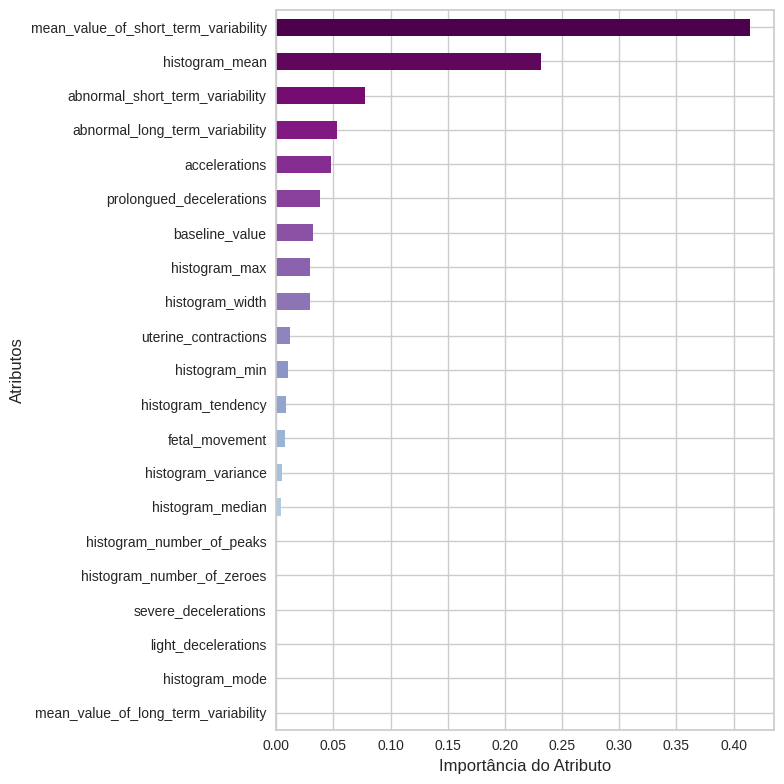

In [ ]:
plot_feature_importances(dt)

Note que algumas das variáveis que havíamos previsto na análise exploratória são relevantes para as decisões do modelo, como `abnormal_short_term_variability` e `abnormal_long_term_variability`.

#### 4.1.2 Dados balanceados

Vamos criar um _baseline_ de árvore de decisão, porém com os dados balanceados, para termos uma comparação nesse cenário. Espera-se que, com classes balanceadas, o algoritmo seja capaz de identificar mais exemplos como sendo da classe minoritária, tirando o viés da análise da classe majoritária.

In [ ]:
dt_bal = DecisionTreeClassifier(max_depth = 5, class_weight = 'balanced', random_state = 42)

dt_bal.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [ ]:
y_pred_bal = dt_bal.predict(X_test)

print(classification_report(y_test, y_pred_bal))
print(f'Recall: {recall_score(y_test, y_pred_bal):.3f}')
print(f'AUC:\t{roc_auc_score(y_test, y_pred_bal):.3f}')

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       497
           1       0.78      0.84      0.81       141

    accuracy                           0.91       638
   macro avg       0.86      0.88      0.87       638
weighted avg       0.91      0.91      0.91       638

Recall: 0.837
AUC:	0.884


De fato, note que, apesar de uma queda na acurácia, houve um grande aumento na métrica _recall_. Além disso, a métrica AUC também aumentou ligeiramente, mostrando que o modelo foi capaz de distinguir melhor entre as duas classes.

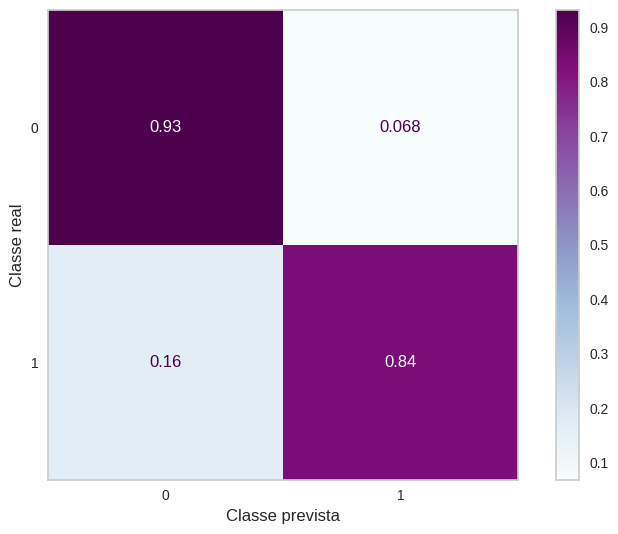

In [ ]:
plot_confusion_matrix(y_pred_bal)

Analisando a importância dos atributos para este segundo modelo:

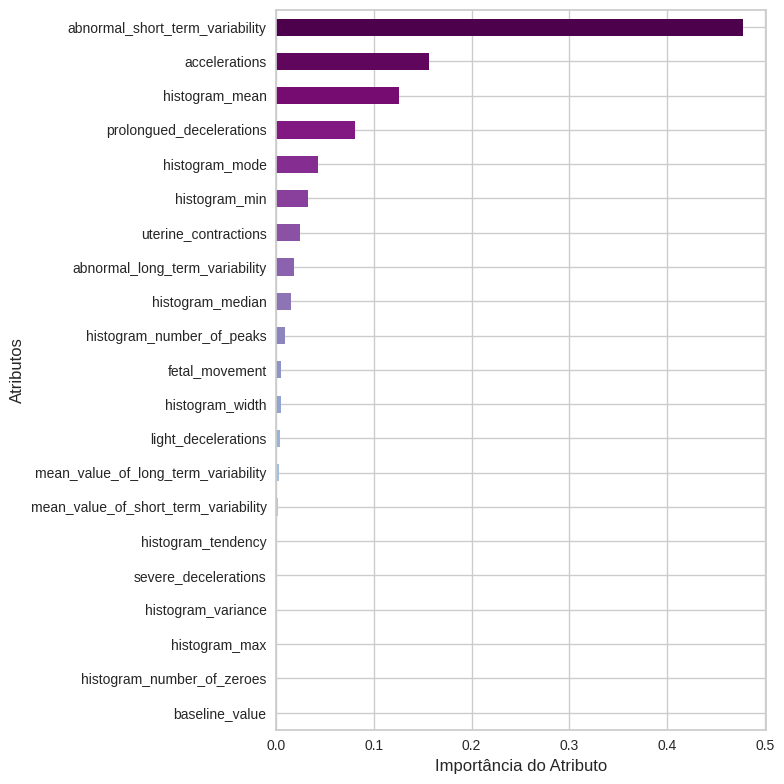

In [ ]:
plot_feature_importances(dt_bal)

Nota-se que a importância dos atributos para as previsões do modelo foram diferentes com relação ao modelo desbalanceado. Os dois atributos mais importantes foram `abnormal_short_term_variability` e `accelerations`. As variabilidades anormais de longo prazo, que ficou em terceiro lugar na relação de importância para os dados desbalanceados, teve um impacto muito menor neste modelo.

O modelo de _baseline_ de árvore de decisão mostra que a abordagem com dados balanceados é o indicado para melhorar as métricas de _recall_ e AUC, enquanto mantemos um nível aceitável de acurácia e precisão. Porém, ainda há 16% de casos falsos negativos, ou seja, que são de risco mas foram classificados como normais.

É preciso diminuir a taxa erros do tipo II para o mínimo possível e, para isso, vamos utilizar das técnicas de busca em grade (**_Grid Search_**) e validação cruzada (**_Cross Validation_**), visando construir novos modelos e aumentar as _performances_ baseadas na métrica _recall_.

## 5. Explorando modelos com Grid Search e Cross Validation

Vamos realizar testes com diversos classificadores, visando otimizá-los acima da performance dos modelos de _baseline_. A partir da construção desses modelos, buscamos os modelos que melhor performarem com base na métrica de _recall_, que reduz a taxa de falsos negativos, garantindo assim mais acertos nas classificações de casos de risco para a saúde do bebê e da mãe.

### 5.1 Preparando funções e parâmetros

Iremos preparar algumas funções para **busca em grade** e **validação cruzada** utilizando a biblioteca `GridSearchCV`. Em seguida, iremos criar uma  função que retorna os melhores hiperparâmetros obtidos nas buscas, bem como os melhores resultados para a métrica _recall_, considerando-se os conjuntos de treino e teste.

Por fim, teremos um classificador otimizado e um relatório de classificação com métricas de _recall_ e AUC para serem comparadas posteriormente com outros modelos. Visualizaremos também a matriz de confusão de cada modelo, obtendo uma representação visual das taxas de erros e da precisão do classificador.

In [ ]:
def create_pipeline(classifier):

  '''
  Cria um pipeline com etapas de normalização e implementação do classificador
  '''

  pipe = Pipeline([('std', StandardScaler()),
                   ('clf', classifier(class_weight = 'balanced', random_state = 42))])

  return pipe

In [ ]:
def make_grid(pipeline, params):

  '''
  Função que recebe o classificador e implementa o objeto de busca em grade
  com validação cruzada utilizando a função GridSearchCV, otimizada
  para a métrica recall.

  clf: classificador
  params: dicionário de hiperparâmetros
  '''

  return GridSearchCV(
                      estimator = pipeline,
                      param_grid = params,
                      scoring = 'recall',
                      cv = 10,
                      n_jobs = -1
                      )

In [ ]:
def find_best_recall(grid_search):

  '''
  Realiza o Grid Search com os dados balanceados e retorna a
  melhor configuração de hiperparâmetros para ajustar o modelo
  com base na métrica de recall.

  Passos:
  1. Ajusta os dados de treino para realizar o GridSearch
  2. Imprime os melhores hiperparâmetros
  3. Imprime o melhor recall para os dados de treino
  4. Realiza previsões nos dados de teste
  5. Imprime o melhor recall nos dados de teste
  6. Imprime o relatório de classificação
  7. Imprime o AUC
  8. Plota a matriz de confusão

  grid_search: Objeto de GridSearchCV para o classificador
  '''

  # Ajuste dos dados de treino balanceados para GridSearch
  grid_search.fit(X_train, y_train)

  # Imprimir os melhores hiperparâmetros
  print(f'Melhores parâmetros: {grid_search.best_params_}')

  # Imprime o melhor recall de treino
  best_recall = grid_search.best_score_
  print(f'\nMelhor recall de treino: {best_recall:.3f}')

  # Previsões nos dados de teste
  y_pred = grid_search.predict(X_test)

  # Melhor recall para os dados de teste
  best_recall = recall_score(y_test, y_pred)
  print(f'\nMelhor recall de teste: {best_recall:.3f}')

  #I Imprimir o relatório de classificação
  print('\nRelatório de classificação',
         classification_report(y_test, y_pred),
         f'\nAUC: \t{roc_auc_score(y_test, y_pred):.3f}')

  # Plotar matriz de confusão
  plot_confusion_matrix(y_pred)

Vamos definir dois intervalos para serem utilizados durante a otimização dos hiperparâmetros.

In [ ]:
param_range = np.arange(1, 11)
param_small = [1.0, .5, .1, .01]

### 5.2 Regressão Logística

Melhores parâmetros: {'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}

Melhor recall de treino: 0.952

Melhor recall de teste: 0.950

Relatório de classificação               precision    recall  f1-score   support

           0       0.98      0.72      0.83       497
           1       0.49      0.95      0.65       141

    accuracy                           0.77       638
   macro avg       0.74      0.84      0.74       638
weighted avg       0.87      0.77      0.79       638
 
AUC: 	0.837


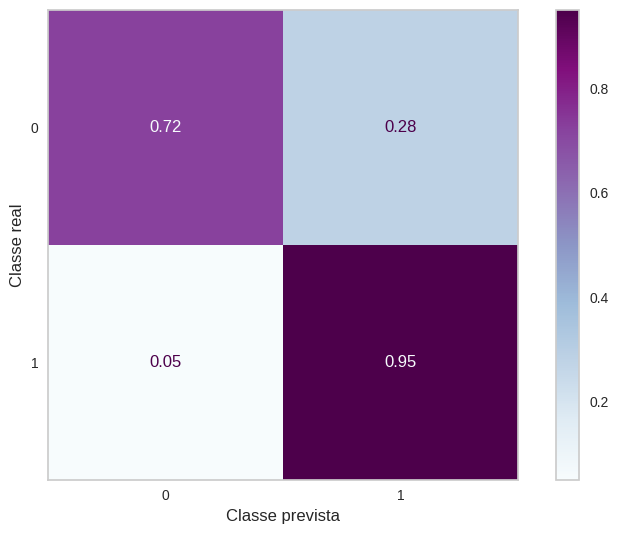

In [ ]:
# Pipeline
pipe_lr = create_pipeline(LogisticRegression)

# Dicionário de hiperparâmetros
param_lr = [{'clf__penalty': ['l1', 'l2'],
             'clf__C': param_small,
             'clf__solver': ['lbgfs', 'liblinear']}]

# Aplicando no objeto de grid search
grid_lr = make_grid(pipe_lr, param_lr)
# Encontrar o melhor recall
find_best_recall(grid_lr)

- Ótimo valor de _recall_ para os dados de teste;
- Bom valor para AUC;
- Acurácia razoável.

### 5.3 Random Forest

Melhores parâmetros: {'clf__criterion': 'entropy', 'clf__max_depth': 6}

Melhor recall de treino: 0.900

Melhor recall de teste: 0.922

Relatório de classificação               precision    recall  f1-score   support

           0       0.98      0.94      0.96       497
           1       0.82      0.92      0.87       141

    accuracy                           0.94       638
   macro avg       0.90      0.93      0.91       638
weighted avg       0.94      0.94      0.94       638
 
AUC: 	0.933


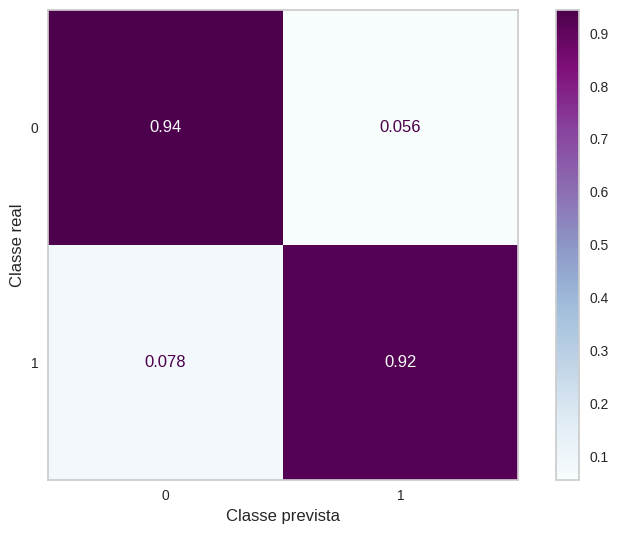

In [ ]:
pipe_rf = create_pipeline(RandomForestClassifier)

param_rf = [{
             'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': param_range
           }]

grid_rf = make_grid(pipe_rf, param_rf)

find_best_recall(grid_rf)

- Bom valor de _recall_ para os dados de teste;
- Ótimo valor da AUC;
- Ótima acurácia.

### 5.4 SVM

Melhores parâmetros: {'clf__C': 1, 'clf__kernel': 'rbf'}

Melhor recall de treino: 0.955

Melhor recall de teste: 0.943

Relatório de classificação               precision    recall  f1-score   support

           0       0.98      0.88      0.93       497
           1       0.69      0.94      0.80       141

    accuracy                           0.89       638
   macro avg       0.84      0.91      0.86       638
weighted avg       0.92      0.89      0.90       638
 
AUC: 	0.912


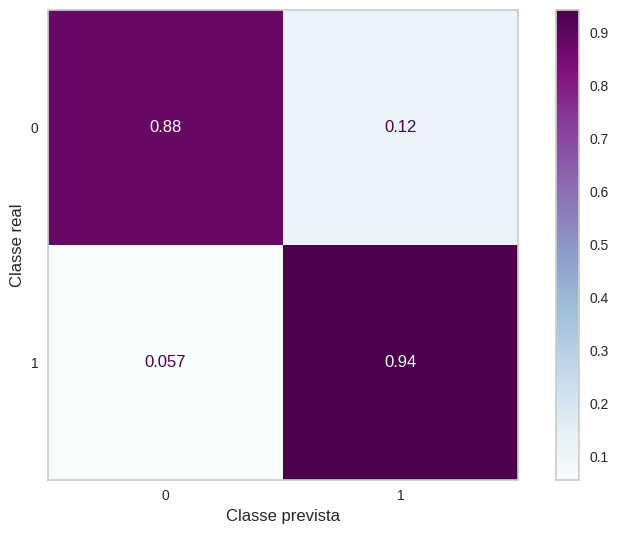

In [ ]:
# Instanciando o modelo dentro da pipeline
pipe_svm = create_pipeline(SVC)

# Dicionário de hiperparâmetros
param_svm = [{
              'clf__C': param_range,
              'clf__kernel': ['linear', 'rbf'],
            }]

# Criar o objeto de grid search para o pipeline
grid_svm = make_grid(pipe_svm, param_svm)

# Otimização
find_best_recall(grid_svm)

- Bom valor de _recall_ com os dados de teste;
- Ótimo valor da AUC;
- Acurácia muito boa.

### 5.5 Extra Trees Classifier

Melhores parâmetros: {'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 2}

Melhor recall de treino: 0.930

Melhor recall de teste: 0.957

Relatório de classificação               precision    recall  f1-score   support

           0       0.99      0.89      0.93       497
           1       0.70      0.96      0.81       141

    accuracy                           0.90       638
   macro avg       0.84      0.92      0.87       638
weighted avg       0.92      0.90      0.91       638
 
AUC: 	0.921


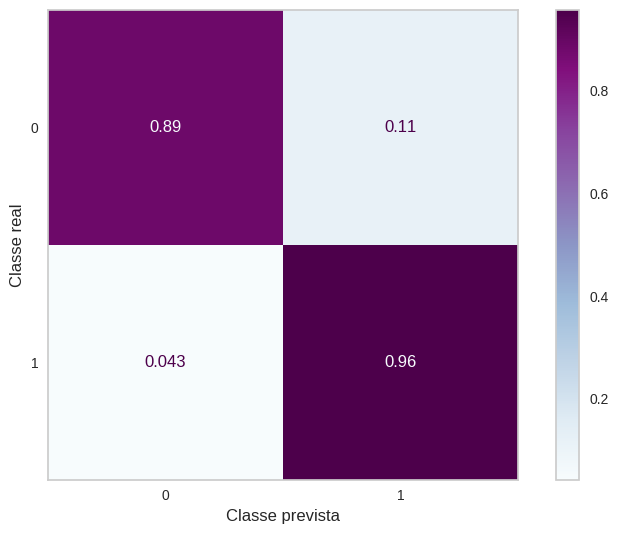

In [ ]:
pipe_et = create_pipeline(ExtraTreesClassifier)

param_et = [{
             'clf__criterion': ['gini', 'entropy'],
             'clf__max_depth': param_range,
             'clf__min_samples_split': param_range[1:],
             'clf__min_samples_leaf': param_range
           }]

grid_et = make_grid(pipe_et, param_et)

find_best_recall(grid_et)

- Maior valor de _recall_ para os dados de teste;
- Ótimo valor para a AUC;
- Ótimo valor para a acurácia.

Por ser o modelo que apresentou os valores mais equilibrados para as métricas de AUC e acurácia, além de ter o maior valor de _recall_, seguiremos com o _Extra Trees Classifier_ para o problema de classificação da saúde fetal.

### 5.8 Avaliação de desempenho: Curva de _precisão-recall_

As curvas de _precisão-recall_ fornecem uma relação entre o poder preditivo do modelo para a classe positiva (*Precisão =* $\frac{VP}{VP+FP}$) e a proporção de positivos que o modelo previu corretamente (*Recall =* $\frac{VP}{VP+FN}$).

Em problemas em que o conjunto de dados apresenta classes altamente desbalanceadas, a curva de _precisão-recall_ se torna muito útil, principalmente quando há muitos exemplos da classe 0 se comparados à classe 1.

Diferentemente dos cálculos para a curva ROC, a curva de _precisão-recall_ não utiliza o número de verdadeiros negativos nos cálculos das métricas que a compõem. Em casos de distribuição de classes enviesada, com muitos exemplos da classe 0, o número de verdadeiros negativos tende a ser maior e a curva ROC acaba superestimando os resultados do modelo, levando a uma interpretação enganosa a respeito do seu desempenho.

> _Entretanto, curvas ROC podem apresentar uma perspectiva exageradamente otimista da performance de um algoritmo se existe um alto enviesamento na distribuição das classes. [...] Curvas de precisão-recall, muito utilizadas em Recuperação de Informação, vem sendo citadas como uma alternativa para as curvas ROC para tarefas com alto viés nas distribuições das classes._

-- [The Relationship Between Precision-Recall and ROC curves](https://dl.acm.org/doi/10.1145/1143844.1143874), 2006.

A curva de _precisão-recall_, portanto, compara a precisão, no eixo _y_, com o _recall_ (ou sensibilidade) no eixo _x_, para diferentes limiares, assim como a curva ROC, porém sem incluir no cálculo os verdadeiros negativos (VN). Vamos analisar essa curva para o melhor modelo testado, que é o _Extra Trees Classifier_.

In [ ]:
# Instanciando o modelo através do pipeline
et = ExtraTreesClassifier(
                          criterion = 'entropy',
                          max_depth = 10,
                          min_samples_leaf = 9,
                          min_samples_split = 2
                          )

# Ajuste do modelo aos dados de treino
et.fit(X_train, y_train)

# Previsões e probabilidades
y_proba = et.predict_proba(X_test)
y_pred = et.predict(X_test)

# Curva de Precisão e Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1])
auc = roc_auc_score(y_test, y_proba[:, 1])

'''
Precisão sem skill (Número de incidências da classe 1 na variável-alvo
do conjunto de testes, dividido pelo número total de exemplos do cteste)
'''
no_skill = len(y_test.loc[y_test == 1]) / len(y_test)

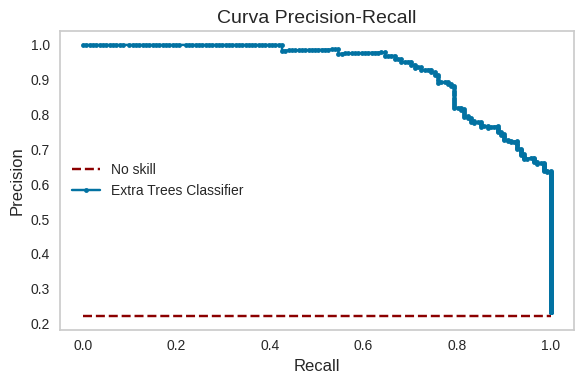

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))

ax.plot([0, 1], [no_skill, no_skill],
        color = 'darkred', linestyle = 'dashed', label = 'No skill')

ax.plot(recall[30:], precision[30:],
        'b.-', label = 'Extra Trees Classifier')

ax.set_xlabel('Recall', fontsize = 12)
ax.set_ylabel('Precision', fontsize = 12)
ax.set_title('Curva Precision-Recall', fontsize = 14)
ax.grid(False)

ax.legend()

fig.tight_layout()
fig.show()

O classificador sem habilidade (_no skill_) é aquele que não consegue discriminar entre as classes, de modo que só seria capaz de prever aleatoriamente, caso o problema fosse balanceado, ou de forma constante, fornecendo apenas a proporção da classe positiva no conjunto de teste. Portanto, a linha do classificador _no skill_ muda de acordo com a distribuição da classe positiva com relação à negativa.

Analisando, contudo, a curva para o modelo de _Extra Trees_, vemos claramente a troca da precisão pelo _recall_, de modo que obtemos uma precisão menor que 70% para um _recall_ acima de 95%.

Como estamos buscando maximizar a taxa de falsos negativos, de modo a não cometer erros que custem a vida da mãe e do bebê, essa troca se faz necessária e a curva mostra que o modelo está se comportando bem na sua capacidade preditiva.

### 5.7 Resumo das performances

Para os modelos construídos a partir do pipeline de pré-processamento e das funções de Grid Search e validação cruzada, os desempenhos variaram discretamente para a métrica _recall_. De modo geral, a melhor performance para os objetivos propostos foi do algoritmo de _Extra Trees_, que obteve 97% para a métrica _recall_, minimizando a taxa de falsos negativos para aproximadamente 3%.

|      **Modelos**      | **Recall** | **AUC** | **Acurácia** |
|:---------------------:|:----------:|:-------:|:------------:|
| _Regressão Logística_ | 0.95       | 0.84    | 0.77         |
| _Random Forest_       | 0.92       | 0.93    | 0.94         |
| _SVM_                 | 0.94       | 0.91    | 0.89         |
| _Extra Trees_         | 0.97       | 0.92    | 0.90         |

Isto significa que, de cada 100 exames de CTG em que há risco para a mãe e o bebê, o modelo é capaz de alertar 97 mães sobre o risco que correm.

## 6. Auto Machine Learning com PyCaret

Agora que construímos modelos de classificação através de um pipeline com Grid Search e Validação Cruzada, vamos nos voltar para técnicas de _machine learning_ automatizado e comparar os resultados com os classificadores criados anteriormente.

Inicialmente, vamos criar dois _Dataframes_ para servir de teste e treino. O conjunto de treino nesse caso será utilizado para criar e comparar modelos, sendo reservado 30% para validação. O _Dataframe_ de teste será composto por dados inéditos para previsões no classificador já finalizado.

In [ ]:
test_df = df_proc.sample(frac = .3, random_state = 42)
train_df = df_proc.drop(test_df.index)

In [ ]:
print('Dimensões dos Dataframes')

print('Teste:\t {}'.format(test_df.shape),
      '\nTreino:\t {}'.format(train_df.shape))

Dimensões dos Dataframes
Teste:	 (638, 22) 
Treino:	 (1488, 22)


### 6.1 Setup

Para fazer a configuração do ambiente do PyCaret para AutoML, iremos utilizar o método `setup` e manipular alguns argumentos referentes ao balanceamento das classes e à normalização dos dados.

In [ ]:
clf = setup(
            data = train_df,
            target = 'fh_class',
            train_size = .7,
            fix_imbalance = True,
            fix_imbalance_method = 'ADASYN',
            normalize = True,
            normalize_method = 'robust',
            session_id = 42,
            experiment_name = 'FHC_09_2023'
            )

,Description,Value
0,Session id,42
1,Target,fh_class
2,Target type,Binary
3,Original data shape,"(1488, 22)"
4,Transformed data shape,"(2045, 22)"
5,Transformed train set shape,"(1598, 22)"
6,Transformed test set shape,"(447, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


Durante a configuração, foram testados alguns métodos para balanceamento, entre eles o RandomUnderSampler, SMOTE, SMOTEENN, TomekLinks e ADASYN.

Dentre estes, foi escolhido o método  de _oversampling_ ADASYN para pois foi o que melhor contribuiu para o aumento da métrica _recall_. Para a normalização, foi utilizado um método robusto para poder lidar com _outliers_, visto que muitas das variáveis no conjunto de dados possuem valores discrepantes e em escalas distintas.

### 6.2 Comparação de modelos de base

Através do método `compare_models`, iremos configurar para que o PyCaret treine uma coleção de modelos básicos de classificação, ranqueando aqueles cuja métrica _recall_ é maior. Iremos escolher um modelo para ser otimizado posteriormente.

In [ ]:
best_clf = compare_models(
                          round = 3,
                          sort = 'recall',
                          n_select = 1
                          )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.861,0.957,0.952,0.625,0.753,0.662,0.692,0.056
ridge,Ridge Classifier,0.849,0.000,0.939,0.607,0.735,0.637,0.669,0.051
lr,Logistic Regression,0.875,0.956,0.922,0.664,0.768,0.687,0.708,0.906
nb,Naive Bayes,0.887,0.945,0.913,0.684,0.780,0.706,0.721,0.050
ada,Ada Boost Classifier,0.928,0.970,0.904,0.805,0.849,0.802,0.807,0.366
knn,K Neighbors Classifier,0.872,0.938,0.900,0.658,0.758,0.674,0.692,0.059
rf,Random Forest Classifier,0.939,0.984,0.878,0.855,0.863,0.824,0.826,0.379
gbc,Gradient Boosting Classifier,0.935,0.980,0.878,0.839,0.855,0.813,0.816,0.646
xgboost,Extreme Gradient Boosting,0.946,0.983,0.878,0.882,0.878,0.844,0.845,0.295
et,Extra Trees Classifier,0.945,0.985,0.874,0.886,0.876,0.841,0.844,0.261


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Dentre todos os modelos básicos, o que melhor performou para a métrica _recall_ foi o algoritmo de Análise de Discriminante Linear (_Linear Discriminant Analysis_), com 95% de acertos para a classe positiva e a menor taxa de falsos negativos.

### 6.3 Criação do modelo

Com o método `create_model`, vamos criar o modelo de _Linear Discriminatory Analysis_ (LDA), utilizando o método de validação cruzada em 10 dobras com classes balanceadas.

In [ ]:
lda = create_model(
                   'lda',
                   round = 3,
                   )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.895,0.964,0.957,0.688,0.800,0.732,0.750
1,0.837,0.967,0.913,0.583,0.712,0.605,0.635
2,0.913,0.978,1.000,0.719,0.836,0.780,0.799
3,0.837,0.968,1.000,0.575,0.730,0.625,0.674
4,0.817,0.958,1.000,0.548,0.708,0.591,0.647
5,0.865,0.928,0.870,0.645,0.741,0.653,0.666
6,0.846,0.931,0.913,0.600,0.724,0.624,0.650
7,0.837,0.930,0.957,0.579,0.721,0.615,0.654
8,0.875,0.975,1.000,0.639,0.780,0.698,0.732


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### 6.4 Otimização de hiperparâmetros

Para melhorar a performance baseada na métrica de _recall_, vamos utilizar o método `tune_model` para testar hiperparâmetros do algoritmo de LDA em 10 dobras estratificadas dos dados de treino.

In [ ]:
tuned_lda = tune_model(
                       lda,
                       round = 3,
                       optimize = 'recall'
                       )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.895,0.964,0.957,0.688,0.800,0.732,0.750
1,0.846,0.967,0.957,0.595,0.733,0.633,0.669
2,0.913,0.980,1.000,0.719,0.836,0.780,0.799
3,0.846,0.968,1.000,0.590,0.742,0.642,0.688
4,0.808,0.958,1.000,0.535,0.697,0.574,0.635
5,0.875,0.930,0.870,0.667,0.755,0.673,0.683
6,0.846,0.929,0.913,0.600,0.724,0.624,0.650
7,0.837,0.933,0.957,0.579,0.721,0.615,0.654
8,0.885,0.976,1.000,0.657,0.793,0.718,0.748


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


A partir da busca em grade com validação cruzada, o algoritmo aumentou a métrica _recall_ ligeiramente. Não foi uma grande diferença, mas é interessante notar que todas as outras métricas aumentaram um pouco também. Abaixo se encontra o modelo instanciado com os hiperparâmetros escolhidos.

In [ ]:
print(tuned_lda)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage='auto', solver='lsqr',
                           store_covariance=False, tol=0.0001)


### 6.5 Previsão com o holdout set

Agora, utilizando o conjunto de validação separado dentro do _Dataframe_ de treino, vamos realizar previsões utilizando o modelo otimizado de LDA. Para isso, iremos utilizar o método `predict_model` e observar a resposta da métrica de _recall_.

In [ ]:
predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.8523,0.9558,0.9697,0.6038,0.7442,0.6481,0.6841


,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_class,prediction_label,prediction_score
35,120.0,0.006,0.109,0.007,0.000,0.0,0.0,27.0,3.7,0.0,...,11.0,0.0,125.0,124.0,126.0,24.0,0.0,0,0,0.9923
454,133.0,0.000,0.003,0.003,0.000,0.0,0.0,58.0,0.5,17.0,...,2.0,0.0,136.0,136.0,137.0,1.0,0.0,0,1,0.7413
1013,139.0,0.008,0.000,0.004,0.000,0.0,0.0,34.0,1.0,0.0,...,4.0,0.0,144.0,145.0,146.0,3.0,-1.0,0,0,0.9935
296,148.0,0.000,0.015,0.000,0.000,0.0,0.0,74.0,0.2,78.0,...,0.0,0.0,148.0,148.0,149.0,0.0,0.0,1,1,0.9978
2056,127.0,0.000,0.001,0.005,0.000,0.0,0.0,63.0,0.7,59.0,...,2.0,0.0,126.0,125.0,127.0,0.0,-1.0,0,1,0.7718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,133.0,0.014,0.000,0.004,0.001,0.0,0.0,28.0,1.6,0.0,...,7.0,1.0,163.0,152.0,158.0,34.0,1.0,0,0,0.9996
224,129.0,0.002,0.016,0.000,0.000,0.0,0.0,53.0,0.6,1.0,...,3.0,0.0,133.0,134.0,135.0,1.0,0.0,0,1,0.5836
645,123.0,0.000,0.000,0.000,0.000,0.0,0.0,76.0,0.2,85.0,...,1.0,0.0,123.0,122.0,124.0,0.0,0.0,1,1,0.9821
777,137.0,0.000,0.004,0.001,0.000,0.0,0.0,75.0,0.2,32.0,...,2.0,0.0,138.0,139.0,140.0,1.0,0.0,1,1,0.9787


Obtivemos um resultado melhor do que aquele dos treinos. Com uma acurácia de aproximadamente 85% e um _recall_ de aproximadamente 97%, o modelo de LDA está funcionando adequadamente na classificação de casos graves de saúde fetal.

### 6.6 Visualização do modelo otimizado

Para termos uma representação visual da performance do modelo, vamos visualizar a matriz  de confusão e a curva de _precisão-recall_.

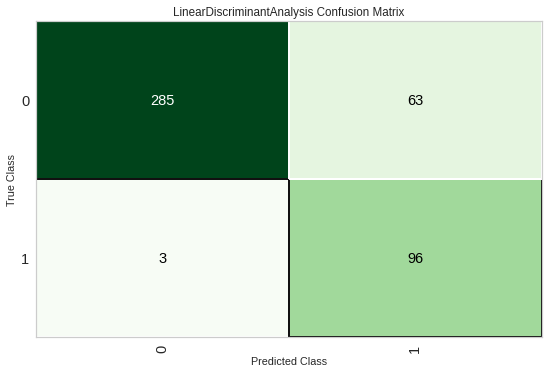

In [ ]:
plot_model(tuned_lda, plot = 'confusion_matrix', scale = .7)

A matriz de confusão permite uma visualização das taxas de verdadeiros positivos e negativos, além das taxas de erros do tipo I e II, associados à falsos positivos e falsos negativos. Nota-se que de 99 casos positivos no conjunto de validação, o modelo foi capaz de prever corretamente 96, resultando num _recall_ de 97%. O custo de uma taxa tão baixa de falsos negativos foi uma precisão de 60,4%.

Vamos analisar também a curva de _precisão-recall_, que deixa clara a perda na precisão para maximizar a métrica recall e, assim, diminuir a taxa de falsos negativos. Note que tivemos uma performance muito parecida com o modelo construído a partir do _Extra Trees Classifier_.

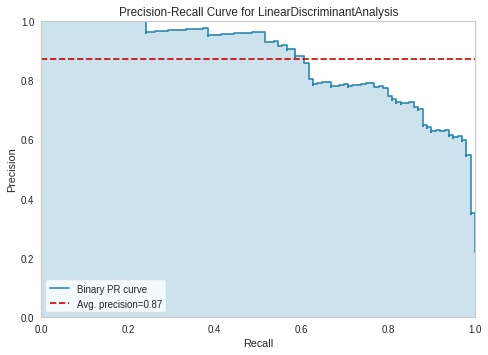

In [ ]:
plot_model(tuned_lda, plot = 'pr', scale = .7)

### 6.7 Finalização do modelo e previsão em dados novos

Para finalizar o modelo, iremos utilizar o método `finalize_model`. Em seguida, para testá-lo em dados nunca antes vistos pelo modelo, iremos aplicar o método `predict_model` sobre os dados do conjunto de testes reservados no início da seção. Assim, teremos uma noção do comportamento do classificador mediante novos exemplos, notando a variação de performance com relação ao obtido durante o treino.

In [ ]:
final_lda = finalize_model(tuned_lda)

In [ ]:
'''
Previsão no conjunto test_df separado no início da seção
'''
unseen_pred = predict_model(final_lda, data = test_df, round = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.826,0.948,0.937,0.566,0.706,0.592,0.630


Note que obtivemos uma performance um pouco pior para o conjunto de teste em exemplos novos. O _recall_ caiu de 97% para ficar em torno de 94%. Da mesma forma ocorreu para as outras métricas, como acurácia, AUC e precisão, principalmente. Este tipo de variação na performance não é um sinal ruim, mas mostra que o modelo conseguiu  generalizar e ter capacidade de classificar exemplos de dados diversos num conjunto menor.

O desempenho nos dados de teste é mais realista pois trata de dados novos, que refletem o desbalanço original entre as classes e que não passou pelas etapas de otimização, que podem fazer o modelo superestimar resultados durante o treino. Contudo, o custo de precisão foi maior para o modelo gerado com AutoML do que para o modelo de *Extra Trees*, sem ainda atingir um _recall_ tão alto quanto deste último.

In [ ]:
unseen_pred.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_class,prediction_label,prediction_score
282,133.0,0.002,0.010,0.003,0.002,0.0,0.000,46.0,1.1,0.0,...,5.0,0.0,139.0,135.0,138.0,9.0,0.0,0,0,0.792
1999,125.0,0.000,0.001,0.009,0.008,0.0,0.000,62.0,1.7,0.0,...,5.0,0.0,130.0,116.0,125.0,29.0,1.0,0,0,0.921
1709,131.0,0.004,0.003,0.004,0.005,0.0,0.001,60.0,2.1,0.0,...,8.0,0.0,133.0,127.0,132.0,21.0,0.0,0,0,0.575
988,131.0,0.011,0.000,0.005,0.000,0.0,0.000,29.0,1.3,0.0,...,8.0,0.0,143.0,145.0,145.0,9.0,1.0,0,0,0.999
2018,125.0,0.000,0.000,0.008,0.007,0.0,0.001,64.0,1.3,0.0,...,4.0,0.0,114.0,111.0,114.0,7.0,0.0,0,0,0.640


### 6.8 Salvando o modelo

Por fim, iremos salvar o modelo para que possa ser posteriormente carregada toda a pipeline de pré-processamento e modelagem que o criou.

In [ ]:
'''
Salvando o modelo final construído a partir de AutoML
com o nome FHC_Final_09_2023
'''
save_model(final_lda, 'FHC_Final_09_2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['baseline_value', 'accelerations',
                                              'fetal_movement',
                                              'uterine_contractions',
                                              'light_decelerations',
                                              'severe_decelerations',
                                              'prolongued_decelerations',
                                              'abnormal_short_term_variability',
                                              'mean_value_of_short_term_variability',
                                              'abnormal_long_term_varia...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=RobustScaler(copy=True,
                                                              

## Conclusão

Neste projeto, investigamos como o exame de CTG pode ter seus dados utilizados para a classificação da saúde fetal, buscando salvaguardar a vida da mãe e do bebê através de uma abordagem com _machine learning_.

De fato, foi observado que o CTG fornece as informações necessárias para realizar as previsões sobre a saúde do bebê, destacando atributos informativos como **variações anormais de curto e longo prazo, acelerações, desacelerações prolongadas, contrações uterinas e movimentos fetais**. Durante a análise exploratória e visualização dos dados, pôde-se observar como essas variáveis se correlacionam entre si, separando bem os casos normais dos graves.

Por exemplo, vimos que **contrações uterinas** e **movimentos fetais** podem indicar risco do bebê caso ele esteja imóvel por algum tempo e com variações anormais nos batimentos cardíacos. Por outro lado, bebês que estejam muito agitados tem também maiores chances de estarem correndo risco.

Além desses fatores, as **desacelerações prolongadas** provaram ser muito informativas quanto ao risco, pois a maioria dos casos com **desacelerações ligeiramente maiores do que zero já indicavam um caso grave**. Todas essas informações puderam ser inferidas a partir da análise dos dados do exame de CTG.

Para a construção dos modelos de _machine learning_, duas abordagens foram utilizadas.

A primeira consistiu na construção de um pipeline para pré-processamento e ajuste dos modelos, com a utilização de técnicas como a **busca em grade** com **validação cruzada** (**GridSearchCV**) e análise de desempenho através da curv**a de precisão-recall**. Foram testados os modelos de **regressão logística, random forest, SVM e extra trees classifier**, buscando minimizar a taxa de falsos negativos. O melhor desempenho, com maior recall, foi do modelo de Extra Trees, que alcançou uma taxa de falsos negativos de aproximadamente 3% em dados nunca antes vistos.

A segunda abordagem consistiu na aplicação de machine learning automatizado através da biblioteca **PyCaret**. Neste caso, buscou-se configurar o pipeline automatizado para o balanceamento e normalização dos dados, resultando na construção de diversos classificadores e posterior comparação entre eles. Foi escolhido aquele que obteve o **maior recall**, que no caso foi o algoritmo de **Análise de Discriminante Linear**, ou *Linear Discriminant Analysis (LDA)*. Na validação, o modelo otimizado atingiu 97% de recall, enquanto que nos testes de desempenho com dados nunca antes vistos, obteve um recall de aproximadamente 94%.

Como houve um custo maior na precisão para o modelo construído via AutoML - não atingindo ainda um _recall_ tão alto quanto o obtido na primeira abordagem - escolheu-se o modelo de *Extra Trees* como sendo o melhor na classificação de saúde fetal.

A tabela abaixo mostra a relação das métricas entre os modelos construídos:

|      **Modelos**      | **Recall** | **AUC** | **Acurácia** |
|:---------------------:|:----------:|:-------:|:------------:|
| _Regressão Logística_ | 0.95       | 0.84    | 0.77         |
| _Random Forest_       | 0.92       | 0.93    | 0.94         |
| _SVM_                 | 0.94       | 0.91    | 0.89         |
| _Extra Trees_         | 0.97       | 0.92    | 0.90         |
| _LDA_                 | 0.94       | 0.95    | 0.83         |

O projeto como um todo ajudou a clarificar pontos importantes de atenção para o diagnóstico da saúde fetal que podem ser usados por médicos obstetras e neonatologistas. Alguns atributos do exame de CTG foram destacados como sendo informativos para a previsão de casos graves, como aceleração e movimentos do bebê, contrações uterinas, variações anormais de curto e longo prazo e desacelerações severas.

Além disso, a recomendação é que o **exame de CTG seja feito o mais frequente possível durante o período de gestação**, principalmente por sua simplicidade e facilidade de interpretação. Os exames de CTG são capazes de prever a saúde fetal e reduzir a mortalidade tanto materna quanto do bebê, tornando-se uma **opção de custo efetivo baixo para evitar fatalidades**.

Da parte de inteligência de dados, modelos de classificação como o **Extra Trees** fornecem uma boa capacidade preditiva e um nível de personalização que permite identificar casos suspeitos ou patológicos com o mesmo nível de precisão, para que o tratamento comece o mais rápido possível. É recomendada uma abordagem que diminua o limiar para a classe positiva, visando que, ao menor sinal de suspeita de risco, os pacientes sejam checados.

## Próximos passos

O CTG é um exame bem difundido para a análise da saúde fetal, de modo que **mais dados de exames melhorariam a performance dos modelos de classificação**. Com mais dados, podemos testar a robustez do modelo em identificar tendências nas variáveis, buscando sempre diminuir os erros de falsos negativos para nenhum caso de risco fique sem tratamento. Pode-se trabalhar na construção de mais atributos para o CTG, trabalhando em colaboração com médicos e ouvindo as queixas e sintomas das mães.

Por fim, apesar de termos explorado bem os efeitos dos batimentos cardíacos e taxas de aceleração na saúde fetal, não foram explorados em profundidade as medidas de histograma do exame, nem o que significam seus valores no contexto da previsão de problemas para o bebê.

## Referências

1. Ayres de Campos _et al_. SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318. (2000)

2. Elizabeth, C.W.G _et al_. Fetal Mortality in the United States: Final 2019–2020 and 2020–Provisional 2021. (2021)

3. Elizabeth, C.W.G _et al_. Fetal Mortality: United States, 2020. (2020)

4. Tenorio, D. S. _et al_. High maternal mortality rates in Brazil: Inequalities and the struggle for justice. (2021)
